In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv("/content/sample_data/weight-height.csv")

In [ ]:
"""dataset.info()
dataset.describe()"""

'dataset.info()\ndataset.describe()'

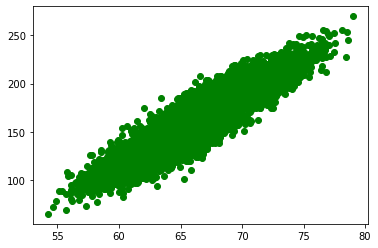

In [ ]:
plt.scatter(dataset['Height'],dataset['Weight'],color='green') 

In [ ]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
dataset['Gender'].replace('Female',0, inplace=True)
dataset['Gender'].replace('Male',1, inplace=True)

In [ ]:
dataset.head()
#dataset1=dataset

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [ ]:
"""
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(dataset1[['Height','Weight']])
y_predicted
"""

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
"""dataset1['cluster']=y_predicted
dataset1.head(20)
"""

In [ ]:
import seaborn as sns
"""
#sns.countplot(x=" Height" , hue = "Gender" , dataset=dataset )
df2=dataset.drop(['Weight'],axis=1)
print(sns.countplot(x='Height',data=df2))
"""

In [ ]:
"""
df3=dataset.drop(['Height'],axis=1)
print(sns.countplot(x='Weight',data=df3))
"""

"\ndf3=dataset.drop(['Height'],axis=1)\nprint(sns.countplot(x='Weight',data=df3))\n"

In [ ]:
#dataset['cluster'].dtypes

In [ ]:
"""ce=km.cluster_centers_
print(ce)"""

[[ 63.42145952 134.41273247]
 [ 69.36477248 188.93688894]]


In [ ]:
dataset.size

30000

In [ ]:
"""
for i in dataset:
  p=dataset['Gender'].bool()
  if p == True:
    dataset['cluster'].replace('0',1, inplace=True)
  else:
    dataset['cluster'].replace('1',0, inplace=True)
"""
"""
p=dataset['Gender'].bool()
print(p) """

"\np=dataset['Gender'].bool()\nprint(p) "

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:

lin_pred = lin_reg.predict(X_test)
print(lin_pred)

[141.93828842 176.55658781 219.77836195 ... 149.97129636 166.83374903
 138.87940678]


In [ ]:
from sklearn import metrics
print(metrics.r2_score(y_test, lin_pred))
print(np.log(metrics.mean_squared_error(y_test, lin_pred)))

0.9052889824534557
4.58365562062179


In [ ]:
print(X_test)
lin_pred1 = lin_reg.predict([[1,67.8]])  # [[gender,height in inches]]  ( 1 feet = 12 inches , female =0 , male =1)
print(lin_pred1*0.453592)  # predicted weight in kg   ( 1 pound == 0.453592 kg ) 

[[ 0.         64.72387669]
 [ 1.         67.27217066]
 [ 1.         74.52097209]
 ...
 [ 0.         66.07110689]
 [ 1.         65.64153589]
 [ 0.         64.21086615]]
[81.51221883]
